# KNN

1703176

06-02-2023

In [ ]:
# K - nearest neighbour - a supervised learning algorithm is well suited for both regression and classification problem in ML.
# Dataset is good if it has fewer than 100k labeled, non-textual tuples.
# Generally applied when linearSVC limits.
# The algo is considered as lazy learner as it doesn't learn a discriminative function.
# Initially, a datapoint is selected, and based on the initial input samples the point
# is assigned to a class based on the similarity to the samples.

# Is usually used when there is little info or no info about the distribution of data.
# As it is a non-parametric in nature. Requires no training time. Requires to observe the whole dataset.
# Mostly used in ---- a. Designing recommendation systems b. Performing Analytical Evaluation

# K in KNN is the core deciding factor. k=7 means th algo takes 7 nn datapoints to determine the class of the object.
# Choosing the right value of K is termed as Parameter Tuning
# Default value for k is 5. k up means smoother predictive curves.
# No structure way to find value of K. Optimal value of k is sqrt of the total number of tuples
# Usually K is odd value to avoid ties during decision making. An error plot / accuracy plot is used to find most appropriate value of k.

# Euclidean distance metric is the default by sklearn KNN classifier. Referred to as L2 norm (don't know what it means)
# Calculates ordinary straight line distance between 2 points.

# Manhattan Distance metric -> city block metric.(absolute distance between 2 points of their cartesian coordinates)
# Used in case of high dimensionality.

#Hamming distance - compare two binary data strings and used with OneHotEncoded data.
# Minkowski distance, Jaccard Distance, Cosine Distance

# Best suited dataset for KNN is probably the iris dataset.

# mostly used in classification problem
# lazy learner algorithm because it does not learn from the training set immediately

# A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model

# Implementing KNN Classifier


In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
dataset = pd.read_csv("/content/drive/MyDrive/4-2_17_Series/NNFS_4204/Iris.csv")

# Features: 4
# instances: 150
# Task: Classification
# No missing values


In [ ]:
# Divide data into features and labels

feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature].values
y = dataset['Species'].values

# print(X)
# print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

# KNN classifiers do not accept string labels. So, we transformed the class in numeric values.
# Also, nothing more specific issues to preprocess data.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 216x360 with 0 Axes>

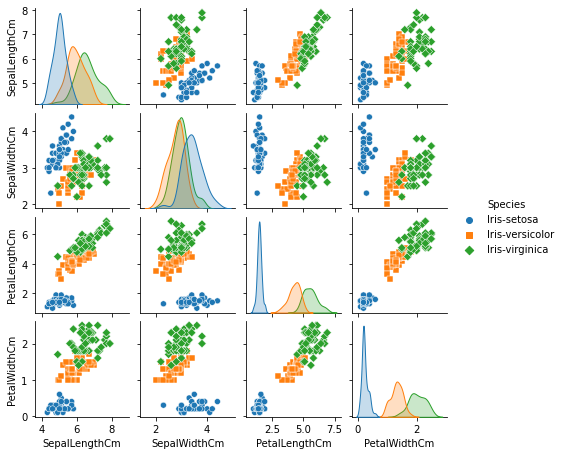

In [ ]:
# Visualize dataset with pairplot

plt.figure(figsize=(3,5))
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size = 1.6, markers = ["o", "s", "D"])
plt.show()

# dataset drop - deletes a column
# size defines the full plot size
# markers are for the 3 class attributes
# histogram of the variables distribution in the diagonals
# other plots show correlation

Below: Update after 6 feb lab (home task)

12-02-2023

<Figure size 432x288 with 0 Axes>

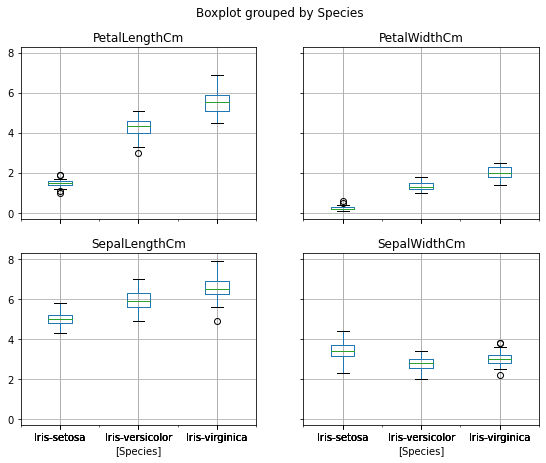

In [ ]:
# visualize with boxplot

plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(9,7))
plt.show()

In [ ]:
# Splitting data in train test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# fitting model and prediction

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5) #initiating classifier, k = 3,4,5 acc = 96.67, k =6,7 acc = 100
classifier.fit(X_train, y_train) # fitting train data
y_pred = classifier.predict(X_test) # predicting y with x-test

In [ ]:
# evaluating the predictions
# the simplest and most commonly used technique to evaluate the prediction of a classification algo
# is by building confusion matrix. Another one is the accuracy score

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')


Accuracy of the model:96.67 %.


In [ ]:
error_rate = []

for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

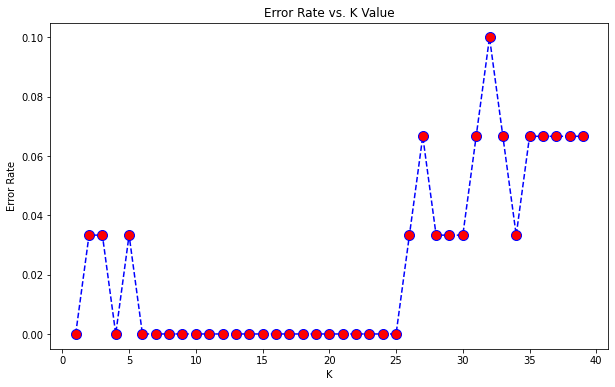

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="b", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train) # fitting train data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:93.33 %.


In [ ]:

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train) # fitting train data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:100.0 %.


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=32)
classifier.fit(X_train, y_train) # fitting train data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')


Accuracy of the model:90.0 %.


Accuracy of the model:90.0 %.


#Implementing KNN Algo Manually

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
dataset = pd.read_csv("/content/drive/MyDrive/4-2_17_Series/NNFS_4204/Iris.csv")

In [ ]:
feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature].values
y = dataset['Species'].values

print(X.size)
print(len(X))


600
150


In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# fitting model and prediction

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
rp = [6.0, 8.0, 5.1, 2.8] #random point

def KNN(k, *rp):
    dis = []
    for i in X:
        euc_dis = (abs(i[0]-rp[0])**2 + abs(i[1]-rp[1])**2 + abs(i[2]-rp[2])**2 + abs(i[3]-rp[3])**2)
        dis.append(euc_dis)
    # maxx = max(dis)
    # minn = min(dis)
    minn = 10.39
    maxx = 45.72
    trans_dis = []
    new_min = 1
    new_max = k # k = 5

    for i in dis:
        v = (((i-minn)/(maxx-minn)) * (new_max - new_min)) + new_min
        trans_dis.append(v)

    length = len(trans_dis)
    new = np.array(trans_dis)
    index = np.argsort(new)

    final = []
    for i in range(0,5):
        final.append(index[i])
    class_detect = []
    for i in final:
        class_detect.append(y[i])
    c0 = 0
    c1 = 0
    c2 = 0
    for i in class_detect:
        if i==0:
            c0 = c0+1
        elif i==1:
            c1 = c1+1
        else:
            c2 = c2+1

    if c1>=c2 and c1>=c0:
        c = 1
    elif c0>=c2 and c0>c1:
        c = 0
    elif c2>c0 and c2>c1:
        c = 2
    else:
        c = 0

    return c

KNN(5, *rp)

2